In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,layers,datasets
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np

In [6]:
# data loading
digits=load_digits()
print(digits.data.shape)
print(digits.keys())

(1797, 64)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [18]:
X = digits.images  
y = digits.target

X = X.astype("float32") / 16.0

X = tf.image.resize(X[..., None], [227, 227]).numpy()  

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# alexnet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
model=Sequential(
    [
        layers.Input(shape=(227,227,1)),
        layers.Conv2D(96,kernel_size=(11,11),strides=4,activation='relu'),
        layers.MaxPooling2D(pool_size=(3,3),strides=2),
        layers.Conv2D(256, kernel_size=(5,5), activation='relu',padding='same'),
        layers.MaxPooling2D(pool_size=(3,3),strides=2),
        layers.Conv2D(384,kernel_size=(3,3), activation='relu',padding='same'),
        layers.Conv2D(384,kernel_size=(3,3), activation='relu',padding='same'),
        layers.Conv2D(256,kernel_size=(3,3), activation='relu',padding='same'),
        layers.MaxPooling2D(pool_size=(3,3),strides=2),
        layers.Flatten(),
        layers.Dense(4096,activation='relu'),
        layers.Dense(4096,activation='relu'),
        layers.Dense(10,activation='softmax'),
    ]
)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.1)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.1036 - loss: 2.7101 - val_accuracy: 0.0972 - val_loss: 2.2840
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.3528 - loss: 1.8887 - val_accuracy: 0.7292 - val_loss: 0.8918
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.7627 - loss: 0.7579 - val_accuracy: 0.8958 - val_loss: 0.3621
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.8979 - loss: 0.2814 - val_accuracy: 0.9306 - val_loss: 0.1650
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.9441 - loss: 0.1616 - val_accuracy: 0.9931 - val_loss: 0.0374
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9788 - loss: 0.0717 - val_accuracy: 0.9792 - val_loss: 0.0551
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9788 - loss: 0.0547 - val_accuracy: 0.9792 - val_loss: 0.0462
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.9714 - loss: 0.0831 - val_accuracy: 0.9583 - val_loss:

In [27]:
y_pred = model.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)
print(y_pred_labels[:10])  # Show first 10 predicted
print("Predicted:", y_pred_labels[:10])
print("Actual:   ", y_test[:10])

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step
[6 9 3 7 2 1 5 2 5 3]
Predicted: [6 9 3 7 2 1 5 2 5 3]
Actual:    [6 9 3 7 2 1 5 2 5 2]


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step


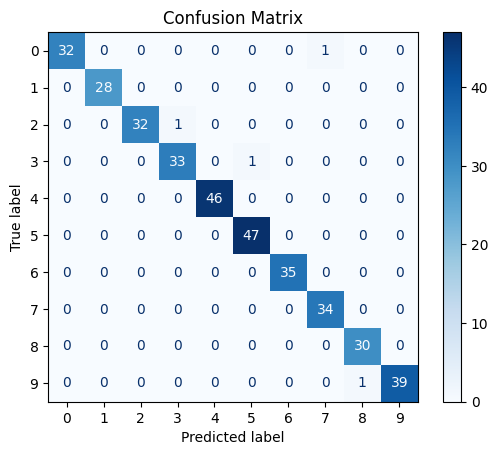

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Predict class labels
y_pred = model.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)
cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [30]:
model.save("alexnet_model.h5")